In [2]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

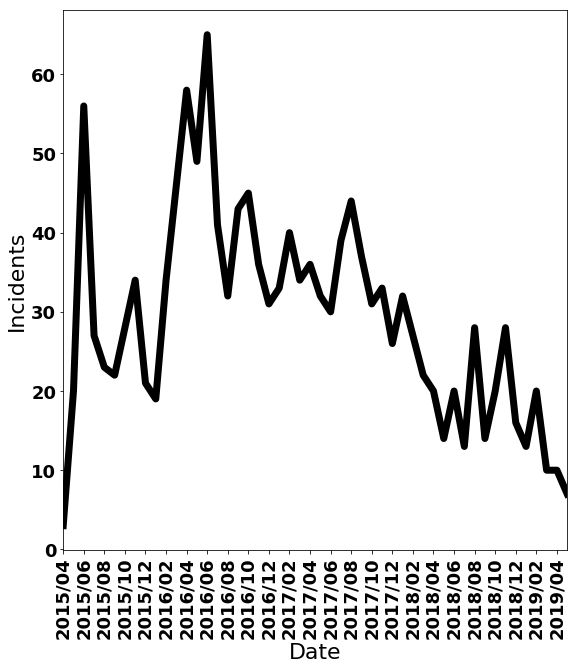

,index,Incident,Date,Incident Type,Address,Longitude,Latitude,Time,Response,Weekday
0,0,Construction Worker Transported To Hospital Wi...,04/17/2019,EMS,"Di Loreto Avenue & Creekwood Lane, Madison, WI",-89.306834,43.144731,2019-04-17T08:17:00-05:00,0:05:00,2
1,1,Downtown Apartment Building Evacuated During E...,04/15/2019,Structure,"200 Block N. Frances Street, Madison, WI",-89.395906,43.070885,2019-04-15T02:32:00-05:00,0:05:00,0
2,2,Structural Collapse Displaces 42 Units At Summ...,04/08/2019,Structure,"1200 Block McKenna Blvd, Madison, WI",-89.504970,43.041072,2019-04-08T15:42:00-05:00,0:04:00,0
3,3,Deli Fire on Atwood Ave.,04/07/2019,Structure,"2700 Block Atwood Ave, Madison, WI",-89.344584,43.093935,2019-04-07T20:31:00-05:00,0:04:00,6
4,4,Three Taken To Hospital Following Crash On Eas...,04/07/2019,Vehicle,"East Washington Ave. & Zeier Rd, Madison, WI",-89.305701,43.129591,2019-04-07T10:50:00-05:00,0:03:00,6
5,5,Sprinkler Holds Fire In Check Until Passerby R...,04/05/2019,Structure,"1700 Block Parkside Drive, Madison, WI",-89.315187,43.120994,2019-04-05T02:31:00-05:00,0:06:00,4
6,6,"Power Pole Hit, Passing Vehicle Struck By Live...",04/04/2019,Electrical,"5300 Block Hoboken Road, Madison, WI",-89.347612,43.050084,2019-04-04T08:33:00-05:00,0:07:00,3
7,7,"Oily Rags, Cigarettes Likely Factors In West S...",03/31/2019,Structure,"Shefford Circle, Madison, WI",-89.500204,43.020958,2019-03-31T20:10:00-05:00,0:05:00,6
8,8,Fire From Discarded Cigarette Caught Early Tha...,03/31/2019,Smoking,"1500 Block Troy Drive, Madison, WI",-89.369096,43.133295,2019-03-31T14:27:00-05:00,0:00:00,6
9,9,Fire Extinguished After Open-Flame Warming Dev...,03/30/2019,Trash/Rubbish,"600 Block Howard Place, Madison, WI",-89.393687,43.075949,2019-03-30T13:11:00-05:00,0:03:00,5


In [23]:
import datetime

def drop_day(x):
    return str(x)[-4:]+"/"+str(x)[:2]

def drop_month(x):
    return str(x)[-4:]

def get_weekday(x):
    return datetime.datetime(int(x[6:]),int(x[:2]),int(x[3:5])).weekday()

def convert_time(timestr):
    try:
        ftr = [3600,60,1]
        return sum([a*b for a,b in zip(ftr, map(int,timestr.split(':')))])
    except ValueError:
        print("ERROR: Bad Response Time Data")


daily_reports = pd.read_csv('FireDailyReports/new_awesome_data.csv')
daily_reports = daily_reports.dropna(subset=["Date"])
daily_reports = daily_reports.reset_index()
daily_reports["Weekday"] = daily_reports["Date"].apply(get_weekday)
monthly_summary = daily_reports.copy()
yearly_summary = daily_reports.copy()
yearly_summary["Date"] = daily_reports["Date"].apply(drop_month)
monthly_summary["Date"] = daily_reports["Date"].apply(drop_day)


font = {
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)



monthly_summary.groupby("Date").count()["index"].plot.line(color=(0,0,0,1), figsize = (10,10), linewidth = 7.0, fontsize = 18)

# get the values we want displayed as tick labels
tick_labels = Series.tolist(monthly_summary.groupby("Date").count().reset_index()["Date"])
del tick_labels[::2]
tick_labels = tuple(tick_labels)
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max,2), tick_labels, rotation=90, fontsize = 18) 

plt.xlabel('Date', fontsize = 22)
plt.ylabel('Incidents', fontsize = 22)
# change the limits and padding of the figure
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))

plt.show()

daily_reports


In [ ]:
font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

 
incidents = yearly_summary.groupby("Date").count()["index"]
incidents.plot.line(figsize = (10,10),linewidth=7.0)

# get the values we want displayed as tick labels
tick_labels = ("2015","2016","2017","2018","2019")
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max + 1), tick_labels, rotation=90) 

plt.xlabel('Date')
plt.ylabel('Incidents')
# change the limits and padding of the figure
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))

plt.show()




In [ ]:
font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

 
incidents = yearly_summary[yearly_summary["Weekday"] == 6].groupby("Date").count()["index"]
incidents.plot.line(figsize = (10,10),linewidth=7.0)

# get the values we want displayed as tick labels
tick_labels = ("2015","2016","2017","2018","2019")
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max + 1), tick_labels, rotation=90) 

plt.xlabel('Date')
plt.ylabel('Incidents')
# change the limits and padding of the figure
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))

plt.title("Incidents on Sunday")
plt.show()


In [ ]:
top_categories = monthly_summary.groupby("Incident Type").count().sort_values(["index"],ascending=False).head(20).index

def simple_type(x):
    if top_categories.contains(x):
        return x;
    else:
        return "Other"
    

condensed_monthly_categories = monthly_summary.copy()
condensed_monthly_categories["Incident Type"] = monthly_summary["Incident Type"].apply(simple_type)


In [ ]:
color_string = "#a86d45, #4587a8, #ff6969, #91ff69, #6991ff, #a88745, #456da8, #ff9169, #69ffb9, #6969ff, #a2a845, #a8457a, #ffb969, #69fff5, #cd69ff, #5fa845, #a86363, #ffe169, #69e1ff, #ff69cd, #45a887, #a07dd4, #e1ff69, #69b9ff, #ff6991"
colors = color_string.split(", ")



font = {
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

broken_summary = condensed_monthly_categories.groupby(['Date', 'Incident Type'])['Date'].count().unstack('Incident Type').fillna(0)
broken_bar = broken_summary[condensed_monthly_categories.groupby(["Incident Type"]).count().index.values]
#broken_bar.plot(kind='bar', stacked=True, legend = False, figsize = (12,12))

list = top_categories.tolist()
list.insert(0,"Other")

broken_bar = broken_bar[list]

#Yearly Summaries
dates_2016 = [index for index in broken_bar.index if index.startswith('2016')]
broken_bar.loc[dates_2016].plot(kind='bar', stacked=True, figsize = (3,3), legend = False, color = colors).set_ylim(0,70)

dates_2017 = [index for index in broken_bar.index if index.startswith('2017')]
broken_bar.loc[dates_2017].plot(kind='bar', stacked=True, figsize = (3,3), legend = False, color = colors).set_ylim(0,70)

dates_2018 = [index for index in broken_bar.index if index.startswith('2018')]
broken_bar.loc[dates_2018].plot(kind='bar', stacked=True, figsize = (3,3), legend = False, color = colors).set_ylim(0,70)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))



In [ ]:
font = {
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)


incident_pie = daily_reports.groupby("Incident Type").count().sort_values(by = ["index"],ascending=False)

other_incidents = Series([sum(incident_pie["index"]) - sum(incident_pie["index"].head(9))],index = ["Other"])
plotable_incidents= pd.concat([incident_pie["index"].head(9),other_incidents])

plotable_incidents.plot.pie( y = "index", figsize = (10,10), legend = False, title = "Incident Types", label = "", fontsize = 10)



In [ ]:
time_comparison = daily_reports.copy()

time_comparison["Response"] = daily_reports["Response"].apply(convert_time)/60

total_time = time_comparison.groupby("Weekday").sum()
num_inc = time_comparison.groupby("Weekday").count()

averages = total_time/num_inc

averages.index = ["Mon.", "Tue.","Wed.","Thu.","Fri.","Sat.","Sun."]
averages["Response"].plot.bar(fontsize=22, figsize = (8,8), title = "Average Response Time (Min)")